In [82]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [83]:
df = pd.read_csv("/Users/pmigdal/Downloads/events.csv", parse_dates=[7, 8])

In [84]:
df.head(2)

,id,facebook_id,facebook_page,picture,description,comments,attending_count,end_time,start_time,place,maybe_count,noreply_count,declined_count,name,feed,created_at
0,6560,1606969096264134,181380568595166,"{""data"":{""is_silhouette"":false,""url"":""https:\/...",Otwarcie wystawy Barbary Kubskiej – opowieść o...,"{""data"":[{""from"":{""name"":""FUNDACJA KULTURA OBR...",39,2016-09-30 18:00:00,2016-09-30 16:00:00,"{""name"":""Fundacja Kultura Obrazu, ul. ks. A. K...",49,271,0,"Barbara Kubska „Zabijam czas, nim czas zabije ...","{""data"":[{""message"":""Radość! Duma!"",""updated_t...",2016-11-17 11:43:15
1,6561,882307485248449,181380568595166,"{""data"":{""is_silhouette"":false,""url"":""https:\/...",Co wspólnego mają ze sobą fotografia i topogra...,null,18,1970-01-01 00:00:00,2016-08-04 16:00:00,"{""name"":""Strefa Centralna"",""location"":{""city"":...",69,155,0,Mapy i fotografie.,"{""data"":[{""story"":""FUNDACJA KULTURA OBRAZU add...",2016-11-17 11:43:15


In [92]:
df.count()

id                 6300
facebook_id        6300
facebook_page      6300
picture            6300
description        6046
comments           6300
attending_count    6300
end_time           6300
start_time         6300
place              6300
maybe_count        6300
noreply_count      6300
declined_count     6300
name               6300
feed               6300
created_at         6300
dtype: int64

In [85]:
start_times = df["start_time"]

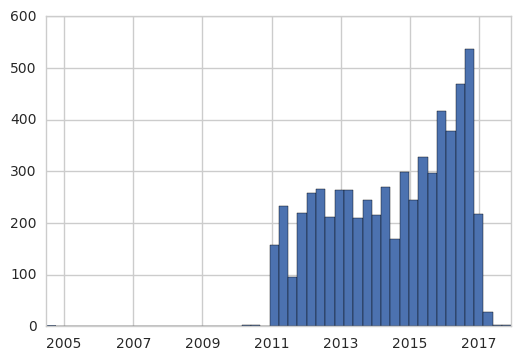

In [86]:
start_times.hist(bins=50)

In [24]:
z = start_times.iloc[0]

In [47]:
z

Timestamp('2016-09-30 16:00:00')

In [25]:
# piątek - sprawdzenie z kalendarzem
z.dayofweek

4

In [26]:
z.hour

16

In [56]:
start_times_matrix = pd.DataFrame({'hour': start_times.apply(lambda x: x.hour),
                                   'dayofweek': start_times.apply(lambda x: x.dayofweek)}) \
                     .pivot_table(None, 'hour', 'dayofweek', len, fill_value=0)
start_times_matrix.columns = ['pon', 'wt', 'sr', 'czw', 'pt', 'sob', 'nd']
start_times_matrix.index.name = "godzina rozpoczęcia"

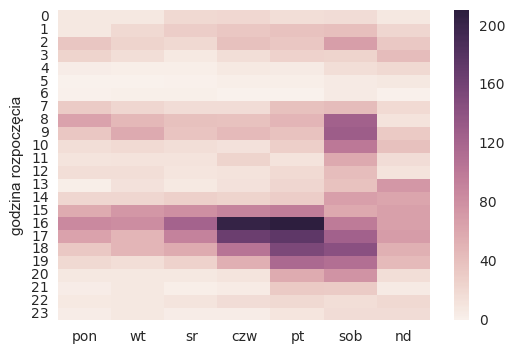

In [72]:
sns.heatmap(start_times_matrix)  # , annot=True, fmt='d'

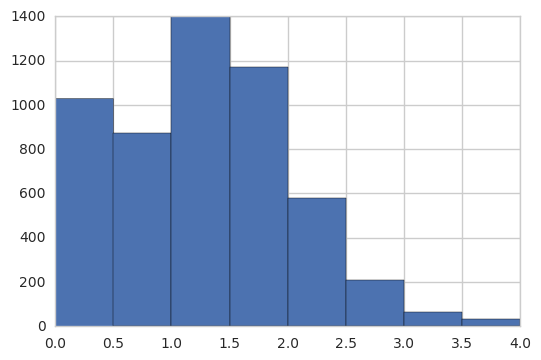

In [87]:
liczby_uczesnitkow = df["attending_count"]
liczby_uczesnitkow[liczby_uczesnitkow > 0] \
  .apply(np.log10) \
  .hist(bins=8, range=(0, 4))

In [68]:
10**0.5

3.1622776601683795

In [88]:
opisy = df["description"]

In [89]:
opisy.iloc[133]

'SZTUKA W NASZYM WIEKU — Rafał Dominik i Szymon Żydek oraz kolekcje Fundacji Sztuki Polskiej ING i Zachęty – Narodowej Galerii Sztuki\n\n„Sztuka w naszym wieku” to wystawa dla wszystkich, którzy właśnie rozpoczęli lub chcą rozpocząć przygodę ze sztuką współczesną. Jej autorzy – Rafał Dominik oraz Szymon Żydek – swoją opowieść zilustrowali wyborem prac pochodzących z kolekcji  Fundacji Sztuki Polskiej ING oraz Zachęty – Narodowej Galerii Sztuki. Wystawa przybrała formę instalacji – przestrzeni do testowania różnych sposobów mówienia i prezentowania dzieł sztuki. Podzielona została na cztery etapy – każdy z nich stanowi osobny rozdział opowieści.\n\nWystawa przygotowana została z okazji jubileuszu 15-lecia Fundacji Sztuki Polskiej ING, jako efekt współpracy z zespołem Zachęty – Narodowej Galerii Sztuki. Na przełomie grudnia i stycznia 2016 roku prezentowana była w salach Zachęty.\n\nartyści: Magdalena Abakanowicz, Azorro, Basia Bańda, Agata Bogacka, Tymek Borowski, Olaf Brzeski, Dorota B

In [90]:
opisy.shape

(6300,)

In [91]:
opisy.count()

6046

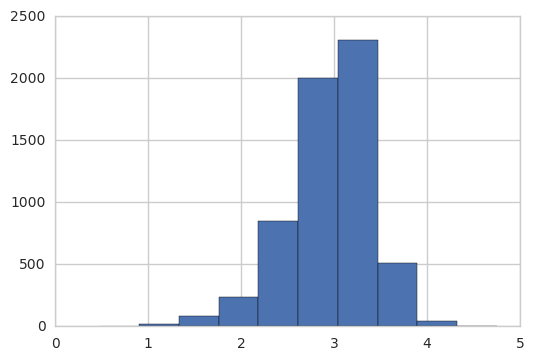

In [81]:
opisy.dropna().apply(len).apply(np.log10).hist()

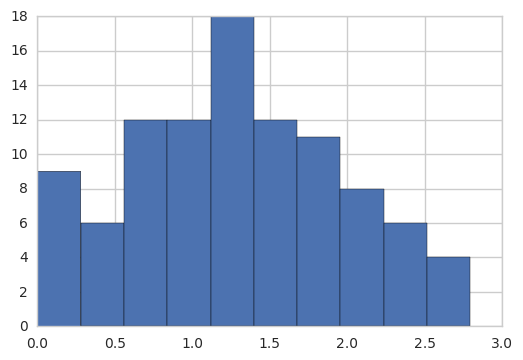

In [95]:
# wydarzenia per strona
df["facebook_page"].value_counts().apply(np.log10).hist()

In [96]:
df["facebook_page"].value_counts().describe()

count     98.000000
mean      64.285714
std      114.995921
min        1.000000
25%        6.000000
50%       18.000000
75%       72.750000
max      618.000000
Name: facebook_page, dtype: float64